In [19]:
from sklearn.datasets import make_classification
from numpy import where
from matplotlib import pyplot
import numpy as np

import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay

sns.set(rc={'figure.figsize':(15,8)})
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, f1_score, recall_score, accuracy_score, RocCurveDisplay, roc_curve,ConfusionMatrixDisplay, classification_report

import pandas as pd

from ydata_profiling import ProfileReport

In [20]:
X, y = make_classification(n_samples=110, n_features=20, n_informative=2)

In [21]:
X = X[:, [2, 3]]

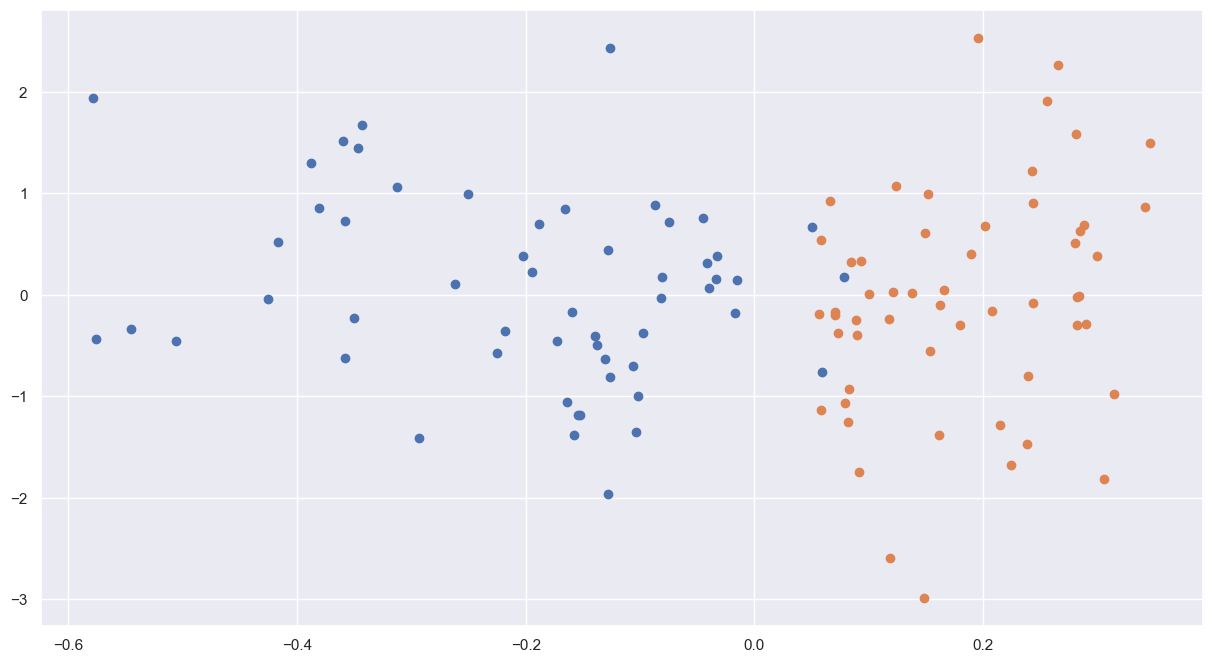

In [22]:
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = where(y == class_value)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [23]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [24]:
y_pred = model.predict_proba(X)

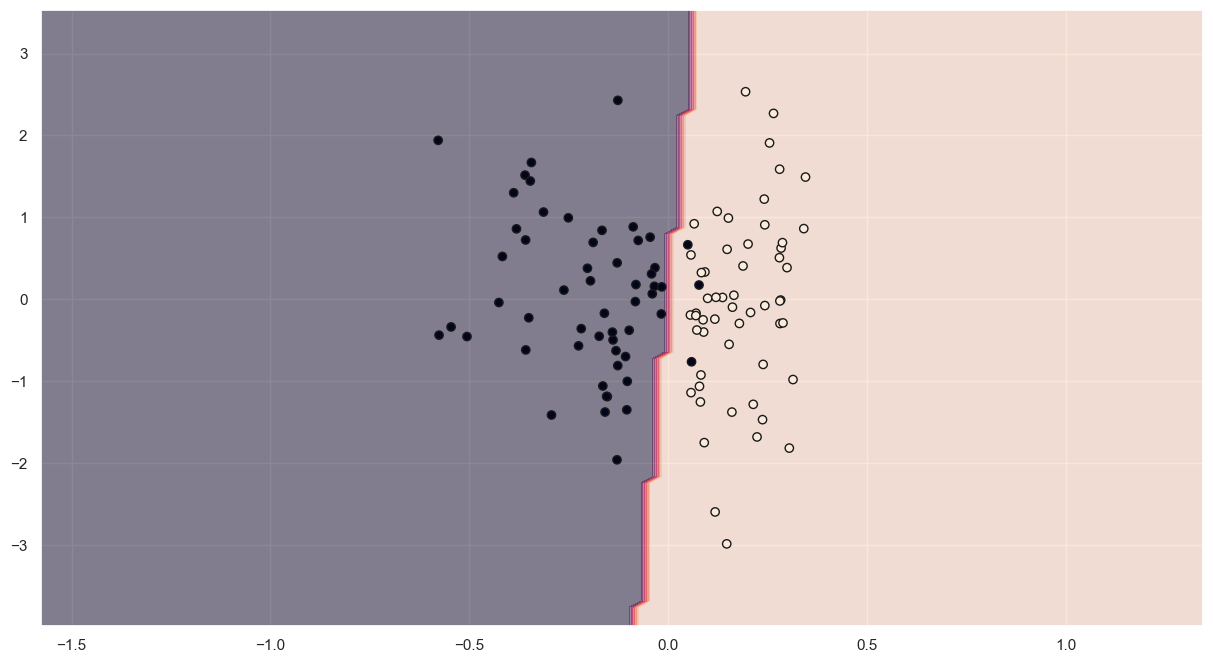

In [25]:
disp = DecisionBoundaryDisplay.from_estimator(
     model, X, response_method="predict",
     alpha=0.5
 )
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")

# Почему формула logloss такая?

Формула logloss основана на принципе максимального правдоподобия, который стремится максимизировать вероятность наблюдаемых данных при данных параметрах модели. В контексте классификации это означает, что мы хотим, чтобы вероятности, предсказанные моделью, как можно точнее соответствовали истинным меткам классов.

## Вывод формулы через максимальное правдоподобие:

Предположим, у нас есть бинарная классификация с истинными метками классов $y \in \{0,1\}$, и модель выдает вероятности $p$ того, что наблюдение принадлежит к классу 1. Для одного наблюдения функция правдоподобия определяется как:

$$
L = p^y(1-p)^{(1-y)}
$$

Прологарифмировав её, получаем логарифм правдоподобия:

$$
\log(L) = y\log(p) + (1-y)\log(1-p)
$$

Поскольку мы стремимся максимизировать логарифм правдоподобия, задача минимизации его отрицательного значения приводит нас к функции потерь, известной как logloss:

$$
L(y, p) = -\big(y\log(p) + (1-y)\log(1-p)\big)
$$

Таким образом, минимизируя logloss, мы фактически максимизируем правдоподобие предсказаний модели относительно истинных данных. Это делает logloss отличным выбором для оценки и оптимизации классификаторов.

## Интерпретация logloss:

- **Для $y = 1$:** формула упрощается до $-\log(p)$. Если модель предсказывает $p$ близкое к 1, значит, она уверена в правильности класса, и logloss стремится к 0. Если $p$ отдаляется от 1, logloss увеличивается, что преподносится как "наказание" за уверенность в неверном предсказании.

- **Для $y = 0$:** формула упрощается до $-\log(1-p)$. Здесь, если $p$ близко к 0, logloss стремится к 0, показывая, что предсказание верно. Если же $p$ увеличивается, logloss возрастает, наказывая модель за неверное предсказание вероятности принадлежности к классу.

Таким образом, logloss эффективно "наказывает" модель за уверенные предсказания неправильного класса, делая его ценным инструментом для оценки точности классификатора.


In [26]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

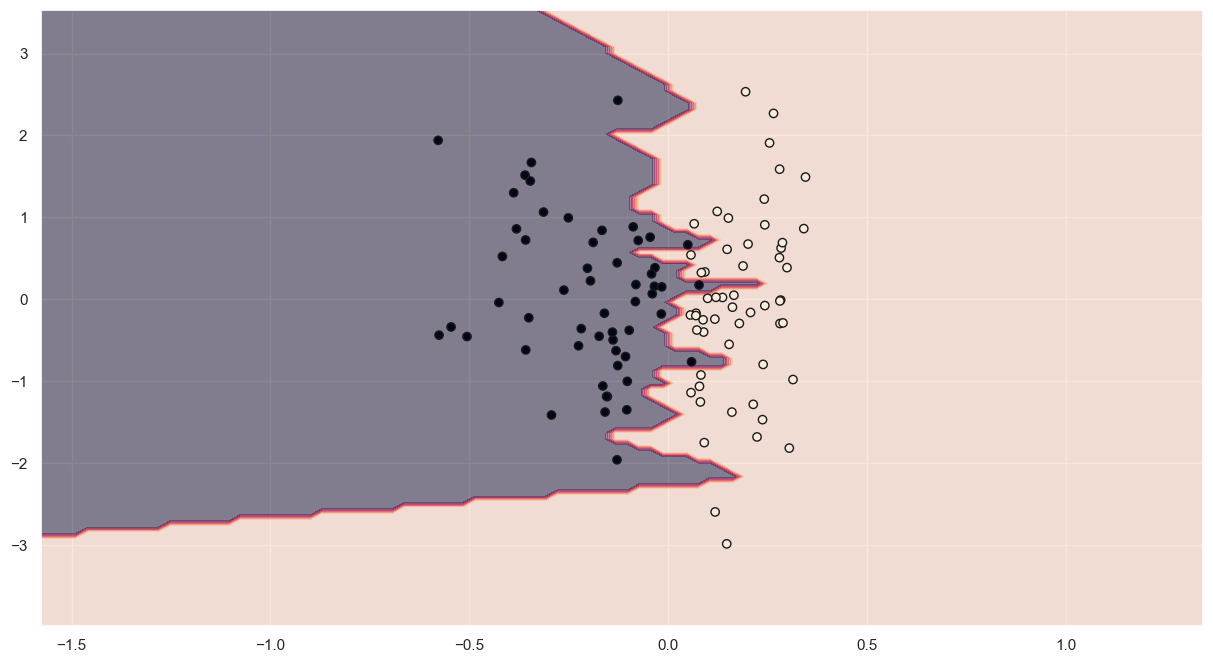

In [27]:
disp = DecisionBoundaryDisplay.from_estimator(
     model, X, response_method="predict",
     alpha=0.5
 )
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")

In [28]:
model = SVC(gamma='auto', kernel='rbf')
model.fit(X, y)

SVC(gamma='auto')

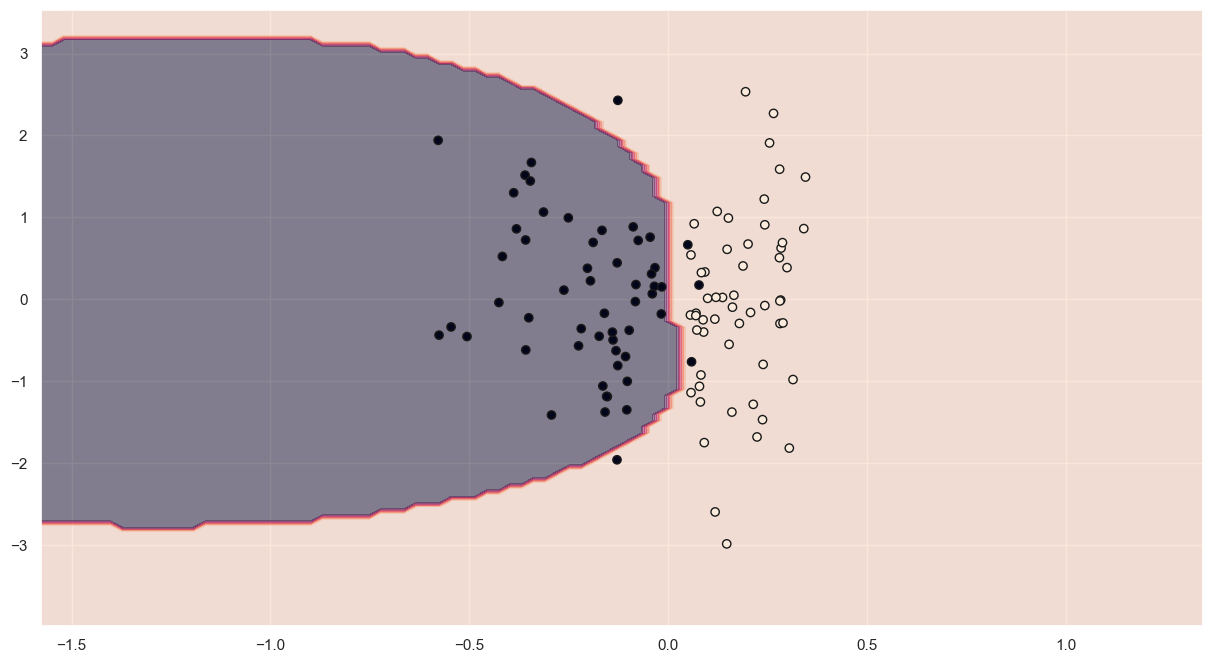

In [29]:
disp = DecisionBoundaryDisplay.from_estimator(
     model, X, response_method="predict",
     alpha=0.5
 )
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")

# Проанализируем датасет побольше

In [30]:
columnNames = ['IsWon', 'ClusterId', 'GameMode', 'GameType', 'AntiMage', 'Axe', 'Bane', 'Bloodseeker', 'CrystalMaiden', 'DrowRanger',
          'Earthshaker', 'Juggernaut','Mirana', 'Shadow Fiend', 'Morphling', 'PhantomLancer', 'Puck', 'Pudge', 'Razor','SandKing',
          'StormSpirit','Sven','Tiny','VengefulSpirit','Windranger','Zeus','Kunkka','Lina','Lich','Lion','ShadowShaman',
          'Slardar','Tidehunter','Witch Doctor','Riki','Enigma','Tinker','Sniper','Necrophos','Warlock','Beastmaster','QueenOfPain',
          'Venomancer','FacelessVoid','SkeletonKing','DeathProphet','PhantomAssassin','Pugna','TemplarAssassin','Viper','Luna',
          'DragonKnight','Dazzle','Clockwerk','Leshrac','NaturesProphet', 'Lifestealer','Dark Seer','Clinkz','Omniknight','Enchantress',
          'Huskar','NightStalker','Broodmother','BountyHunter','Weaver','Jakiro','Batrider','Chen','Spectre','Doom','AncientApparition',
          'Ursa','SpiritBreaker','Gyrocopter','Alchemist','Invoker','Silencer','OutworldDevourer','Lycanthrope','Brewmaster',
          'ShadowDemon','LoneDruid','ChaosKnight','Meepo','TreantProtector','OgreMagi','Undying','Rubick','Disruptor','NyxAssassin',
          'NagaSiren','KeeperOfTheLight','Wisp','Visage','Slark','Medusa','TrollWarlord','CentaurWarrunner','Magnus',
          'Timbersaw','Bristleback','Tusk','Skywrath Mage','Abaddon','ElderTitan', 'LegionCommander', 'Techies',
          'EmberSpirit','EarthSpirit','AbyssalUnderlord','Terrorblade','Phoenix','Oracle','WinterWyvern','ArcWarden','MonkeyKing']

train = pd.read_csv('dota2Train.csv', names = columnNames)
test = pd.read_csv('dota2Test.csv', names = columnNames)

FileNotFoundError: [Errno 2] No such file or directory: 'dota2Train.csv'



Данный датасет был уже разбит на обучающую и тестовую выборки. Проверим их размерности и основные параметры:


In [31]:
train.head()

NameError: name 'train' is not defined

In [32]:
train.shape

NameError: name 'train' is not defined

In [ ]:
test.shape

In [ ]:
ProfileReport(train)



В данных выборках находится в сумме 102944 записей и 117 атрибутов, где каждая запись - это отдельно взятая игра, где:

    IsWon - выиграна данная игра или нет

    ClusterId - Id региона, где данная игра проходила (Восточная, Западная Европа, Северная, Южная Америка и т.п)

    GameMode - Режим игры (All pick - свободный выбор героя, Random Draft - выбор из рандомного пула героев и т.д.)

    Тип игры - Тип игры (Рейтинговая, обычная и т.д.)

5 - 117) Данные по всем героям, в каждом ряду(игре) находится информация о 10 героях, которые были в данное игре, и в какой команде были выбраны (1 - победителей, -1 - проигравших)

Исходя из размерностей обучающей и тестовой выборок, можно сделать вывод, что они поделены в соотношении 10% и 90%. В таком соотношении обучающая выборка является слишком большой и скорее всего результат на тестовой выборке будет не совсем удовлетворительным.

In [ ]:
all_data = pd.concat((train, test), sort=True).reset_index(drop=True)
data = pd.get_dummies(all_data, columns=['GameMode', 'GameType', 'ClusterId'])

In [ ]:
data.IsWon = data.IsWon.replace({-1:0})

In [ ]:
data.drop(['Lina', 'Terrorblade'], axis=1, inplace = True)

In [ ]:
y = data['IsWon']
X = data.drop('IsWon', axis=1)

In [ ]:
np.mean(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

Начнем с логистической регрессии

In [ ]:
%%time
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
%%time
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
roc_auc_score(y_test,y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
   display_labels=model.classes_)

In [ ]:
disp.plot()

In [ ]:
y_test_proba = model.predict_proba(X_test)[:, -1]

In [ ]:
y_test_proba

Проверим KNN

In [ ]:
%%time
model = KNeighborsClassifier(n_neighbors=20)
model.fit(X_train, y_train)

In [ ]:
%%time
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
   display_labels=model.classes_)
disp.plot()

Проверим SVM

In [ ]:
%%time
model = SVC(gamma='auto', kernel='linear')
model.fit(X_train.iloc[:, [2, 3]], y_train)

In [ ]:
%%time
y_pred = model.predict(X_test.iloc[:, [2, 3]])

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
   display_labels=model.classes_)
disp.plot()

In [ ]:
%%time
model = SGDClassifier()
model.fit(X_train, y_train)

In [ ]:
%%time
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
   display_labels=model.classes_)
disp.plot()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=7)

In [ ]:
pcaX = pca.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pcaX, y, test_size=0.33)

In [ ]:
%%time
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
   display_labels=model.classes_)
disp.plot()

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
train.Credit_Score.value_counts()

In [ ]:
train.Credit_Score = train.Credit_Score.apply(lambda x: 'Poor' if x == 'Standard' else x)

In [ ]:
train.to_csv('credit_score_prediction.csv', index=False)